### Sigmoid function

![](images/logistic1.jpeg)

$logit(P(y=1|\mathbf{x})) = w_0x_0+w_1x_1+\dots+w_mw_m=\Sigma_{i=0}^mw_ix_i=\mathbf{w}^T\mathbf{x}$

$\phi(z)=\frac{1}{1+e^{-z}}$

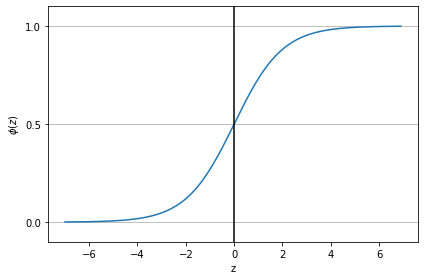

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k') # Add a vertical line across the Axes
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi(z)$')

plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()  # Get the current Axes
ax.yaxis.grid(True) # Whether to show the grid lines
plt.tight_layout()
plt.show();

### 로지스틱 비용 함수의 가중치 학습

최대 가능도 -> 로그 가능도 함수 -> 비용 함수
\begin{falign}

$
J(\phi(z),y;\mathbf{w}) = 
 \begin{cases} 
 -log(\phi(z)) \quad y=1일 때 \\ 
 -log(1-\phi(z)) \quad y=0일 때 
 \end{cases}
$


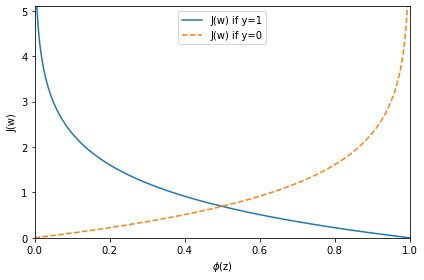

In [8]:
def cost_1(z):
    return - np.log(sigmoid(z))

def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]

plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show();


### Adaline to logistic regression

비용함수만 바꿈

$J(\mathbf{w}) = - \Sigma_i[y^{(i)}log(\phi(z^{(i)})) + (1-y^{(i)})log(1-\phi(z^{(i)}))]$  

=> `(-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))))`

In [12]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    markers = ('s', 'x', 'o', '^', 'V')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1],
                    facecolors='None', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o', s=100, label='test set')

class LogisticRegressionGD(object):
    """
    w_: 1d-array 학습된 가중치
    cost_ : list 에포크마다 누적된 로지스틱 비용 함수 값
    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()

            # 제곱 오차합 대신 로지스틱 비용 계산
            cost = (-y.dot(np.log(output)) - ((1-y).dot(np.log(1 - output))))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:] + self.w_[0])
    
    def activation(self, z):
        """로지스틱 시그모이드 활성화 계산"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250))) # Clip (limit) the values in an array.
        # Given an interval, values outside the interval are clipped to the interval edges. 
        # For example, if an interval of [0, 1] is specified, 
        # values smaller than 0 become 0, and values larger than 1 become 1.

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

클래스 레이블: [0 1 2]


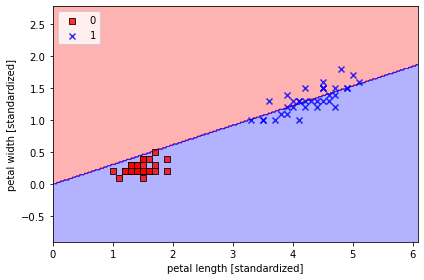

In [13]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('클래스 레이블:', np.unique(y))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

X_train_01_subset = X_train[(y_train == 0 | (y_train == 1))]
y_train_01_subset = y_train[(y_train == 0 | (y_train == 1))]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### 사이킷런 로지스틱 회귀

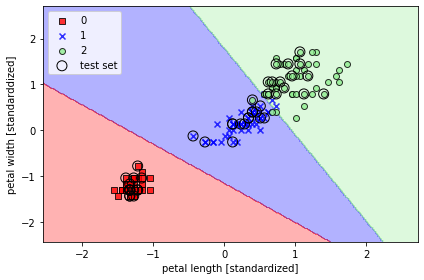

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, 
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standarddized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### L1 규제

$J(\mathbf{w}) = \Sigma_i[-y^{(i)}log(\phi(z^{(i)})) - (1-y^{(i)})log(1-\phi(z^{(i)}))] + \frac{\lambda}{2}||\mathbf{w}||^2$  

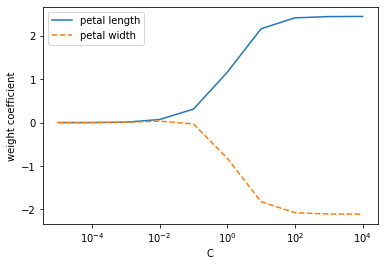

In [18]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1, multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)

plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()